In [1]:
import yfinance as yf
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [7]:
btc = pd.DataFrame(yf.download("BTC-USD",period="1d",start="2019-01-01",end="2024-05-21"))
btc

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4324200990
2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5244856836
2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211,3836.741211,4530215219
2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529,3857.717529,4847965467
2019-01-05,3851.973877,3904.903076,3836.900146,3845.194580,3845.194580,5137609824
...,...,...,...,...,...,...
2024-05-16,66256.109375,66712.429688,64613.054688,65231.582031,65231.582031,31573077994
2024-05-17,65231.296875,67459.460938,65119.316406,67051.875000,67051.875000,28031279310
2024-05-18,67066.210938,67387.328125,66663.500000,66940.804688,66940.804688,16712277406


<Axes: xlabel='Date'>

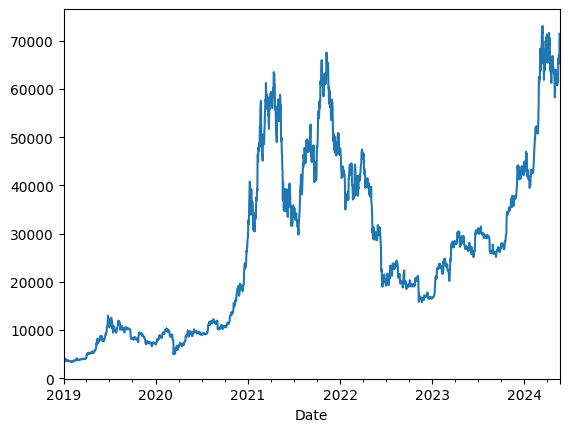

In [8]:
btc['Close'].plot(kind='line')

In [9]:
btc['pct_change'] = btc['Close'].pct_change()
btc.head(2)

,Open,High,Low,Close,Adj Close,Volume,pct_change
Date,,,,,,,
2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4324200990,NaN
2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5244856836,0.025989


In [10]:
btc['down'] = np.where(btc['pct_change'] < 0 ,1,0)
btc.head(10)

,Open,High,Low,Close,Adj Close,Volume,pct_change,down
Date,,,,,,,,
2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4324200990,NaN,0
2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5244856836,0.025989,0
2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211,3836.741211,4530215219,-0.027050,1
2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529,3857.717529,4847965467,0.005467,0
2019-01-05,3851.973877,3904.903076,3836.900146,3845.194580,3845.194580,5137609824,-0.003246,1
2019-01-06,3836.519043,4093.297363,3826.513184,4076.632568,4076.632568,5597027440,0.060189,0
2019-01-07,4078.584961,4092.613525,4020.894043,4025.248291,4025.248291,5228625637,-0.012605,1
2019-01-08,4028.472168,4109.020996,3996.955322,4030.847900,4030.847900,5306593305,0.001391,0
2019-01-09,4031.552002,4068.403564,4022.662842,4035.296387,4035.296387,5115905225,0.001104,0


In [17]:
(btc['down'] != btc['down'].shift(1)).head(10) #determine if actual is different than the previous one, False means days today and yesterday have been loss days

Date
2019-01-01     True
2019-01-02    False
2019-01-03     True
2019-01-04     True
2019-01-05     True
2019-01-06     True
2019-01-07     True
2019-01-08     True
2019-01-09    False
2019-01-10     True
Name: down, dtype: bool

In [18]:
((btc['down'] != btc['down'].shift(1)).cumsum()).head(10) #si el numero cambia es porque, ha habido un candle change

Date
2019-01-01    1
2019-01-02    1
2019-01-03    2
2019-01-04    3
2019-01-05    4
2019-01-06    5
2019-01-07    6
2019-01-08    7
2019-01-09    7
2019-01-10    8
Name: down, dtype: int64

In [28]:
btc.head(10)

,Open,High,Low,Close,Adj Close,Volume,pct_change,down,candle_change
Date,,,,,,,,,
2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4324200990,NaN,0,1
2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5244856836,0.025989,0,1
2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211,3836.741211,4530215219,-0.027050,1,2
2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529,3857.717529,4847965467,0.005467,0,3
2019-01-05,3851.973877,3904.903076,3836.900146,3845.194580,3845.194580,5137609824,-0.003246,1,4
2019-01-06,3836.519043,4093.297363,3826.513184,4076.632568,4076.632568,5597027440,0.060189,0,5
2019-01-07,4078.584961,4092.613525,4020.894043,4025.248291,4025.248291,5228625637,-0.012605,1,6
2019-01-08,4028.472168,4109.020996,3996.955322,4030.847900,4030.847900,5306593305,0.001391,0,7
2019-01-09,4031.552002,4068.403564,4022.662842,4035.296387,4035.296387,5115905225,0.001104,0,7


In [44]:
btc['candle_change'] = (btc['down'] != btc['down'].shift(1)).cumsum()
btc['consecutive_count'] = btc.groupby('candle_change').cumcount()+1 #cuentas cuanta ocurrencias consecutivas ha habido del candle change
btc['consecutive_count'] = np.where(btc['down']==1,-btc['consecutive_count'],btc['consecutive_count']) #fix for red candles
btc.head(10)

,Open,High,Low,Close,Adj Close,Volume,pct_change,down,candle_change,consecutive_count
Date,,,,,,,,,,
2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4324200990,NaN,0,1,1
2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5244856836,0.025989,0,1,2
2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211,3836.741211,4530215219,-0.027050,1,2,-1
2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529,3857.717529,4847965467,0.005467,0,3,1
2019-01-05,3851.973877,3904.903076,3836.900146,3845.194580,3845.194580,5137609824,-0.003246,1,4,-1
2019-01-06,3836.519043,4093.297363,3826.513184,4076.632568,4076.632568,5597027440,0.060189,0,5,1
2019-01-07,4078.584961,4092.613525,4020.894043,4025.248291,4025.248291,5228625637,-0.012605,1,6,-1
2019-01-08,4028.472168,4109.020996,3996.955322,4030.847900,4030.847900,5306593305,0.001391,0,7,1
2019-01-09,4031.552002,4068.403564,4022.662842,4035.296387,4035.296387,5115905225,0.001104,0,7,2


In [ ]:
#for 3 days 
btc['long_signal'] = 

<Axes: ylabel='Frequency'>

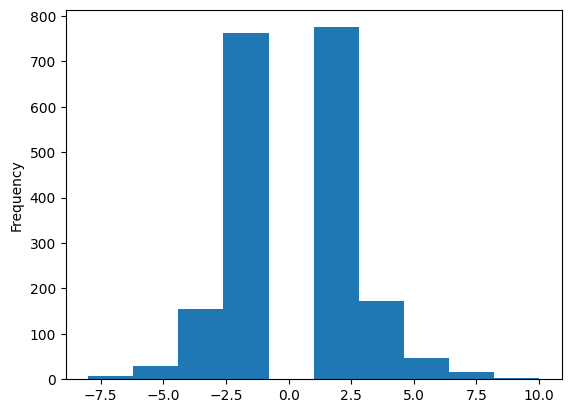

In [43]:
btc['consecutive_count'].plot(kind='hist')

In [6]:
up_days = len(btc[btc['down']==0])
up_days

170

In [65]:
((btc['down']==1) & (btc['down'].shift(-1) == 1) & (btc['down'].shift(-2) == 0)).sum() #parenthesis fucked up my boolean condition

46

In [38]:
down_up = ((btc['down'] == 1) & (btc['down'].shift(-1)==0)).sum()
down_up/len(btc[btc['down']==0])

0.5294117647058824

In [67]:
down_down_up = ((btc['down']==1) & (btc['down'].shift(-1) == 1) & (btc['down'].shift(-2) == 0)).sum()
down_down_up/len(btc[btc['down']==0])

0.27058823529411763

In [73]:
dddu = ((btc['down']==1) & (btc['down'].shift(-1) == 1) & (btc['down'].shift(-2) == 1) & (btc['down'].shift(-3) == 0)).sum()
dddu

25

In [38]:
pattern_series = ((btc['down'] == 1) & 
                  (btc['down'].shift(-1) == 1) & 
                  (btc['down'].shift(-2) == 1) & 
                  (btc['down'].shift(-3) == 1) & 
                  (btc['down'].shift(-4) == 1) & 
                  (btc['down'].shift(-5) == 0)).sum()

denom = ((btc['down'] == 1) & 
        (btc['down'].shift(-1) == 1) & 
        (btc['down'].shift(-2) == 1) & 
        (btc['down'].shift(-3) == 1) & 
        (btc['down'].shift(-4) == 1) ).sum() 


In [39]:
pattern_series,denom

(8, 17)

In [56]:
pattern = [1, 1, 0]
sequence_count = 0

# Convert the 'down' column to a list for processing
down_list = btc['down'].tolist()

# Check for the pattern in the list using a sliding window approach
for i in range(len(down_list) - 2):
    # Check if the slice from the list matches the pattern
    if down_list[i:i+3] == pattern:
        sequence_count += 1
sequence_count

46

# Backtesting

In [31]:
from backtesting import Backtest,Strategy


In [21]:
btc.down

Date
2022-01-01    0
2022-01-02    1
2022-01-03    1
2022-01-04    1
2022-01-05    1
             ..
2022-12-27    1
2022-12-28    1
2022-12-29    0
2022-12-30    1
2022-12-31    1
Name: down, Length: 365, dtype: int64

In [58]:
class BTCstrat(Strategy):
    def init(self):
        self.entry_signal = False
        pass

    def next(self):
        if len(self.data) < 6 :
            return #not enough data points

        if self.entry_signal:    
            if self.data.down[-1] == 1:
                print("Selling")
                self.position.close()
                self.sell()
                self.entry_signal = False 
    
        # Check the pattern of 5 down days followed by an up day
        if not self.position and not self.entry_signal:
            if (self.data.down[-6] == 1 and 
                self.data.down[-5] == 1 and 
                self.data.down[-4] == 1 and 
                self.data.down[-3] == 1 and 
                self.data.down[-2] == 1 and 
                self.data.down[-1] == 0):

                print("Longing")    
                # Enter long position
                self.position.close()
                self.buy()
                self.entry_signal = True 

In [62]:
bt = Backtest(btc,BTCstrat,cash=100000,commission=0.01)
stats = bt.run()

Longing
Selling


In [63]:
bt.plot()

/Users/diegotorpoco/Documents/peopl/peoplvenv/lib/python3.9/site-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/Users/diegotorpoco/Documents/peopl/peoplvenv/lib/python3.9/site-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/Users/diegotorpoco/Documents/peopl/peoplvenv/lib/python3.9/site-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  fig = gridplot(
/Users/diegotorpoco/Documents/peopl/peoplvenv/lib/python3.9/site-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  fig = gridplot(


GridPlot(id='p1653', ...)

In [64]:
print(stats)

Start                     2022-01-01 00:00:00
End                       2022-12-31 00:00:00
Duration                    364 days 00:00:00
Exposure Time [%]                   97.808219
Equity Final [$]                148930.145781
Equity Peak [$]                 150562.925078
Return [%]                          48.930146
Buy & Hold Return [%]              -65.299639
Return (Ann.) [%]                   48.930146
Volatility (Ann.) [%]               53.220801
Sharpe Ratio                          0.91938
Sortino Ratio                        2.196697
Calmar Ratio                         2.204958
Max. Drawdown [%]                   -22.19096
Avg. Drawdown [%]                   -4.799001
Max. Drawdown Duration      106 days 00:00:00
Avg. Drawdown Duration       27 days 00:00:00
# Trades                                    2
Win Rate [%]                             50.0
Best Trade [%]                      59.895779
Worst Trade [%]                     -0.788967
Avg. Trade [%]                    